<h2>Logistic Regression Using Gradient Descent</h2>

In [9]:
dataset = read.csv("wisc_bc_data.csv")
data = dataset[230:239,]
data = data[-1]
data = data[, 1:3]
data$diagnosis= factor(data$diagnosis, levels = c("M", "B"), labels = c(0, 1))


In [10]:
data

,diagnosis,radius_mean,texture_mean
230,0,12.830,22.33
231,0,17.050,19.08
232,1,11.320,27.08
233,1,11.220,33.81
234,0,20.510,27.81
235,1,9.567,15.91
236,1,14.030,21.25
237,0,23.210,26.97
238,0,20.480,21.46
239,1,14.220,27.85


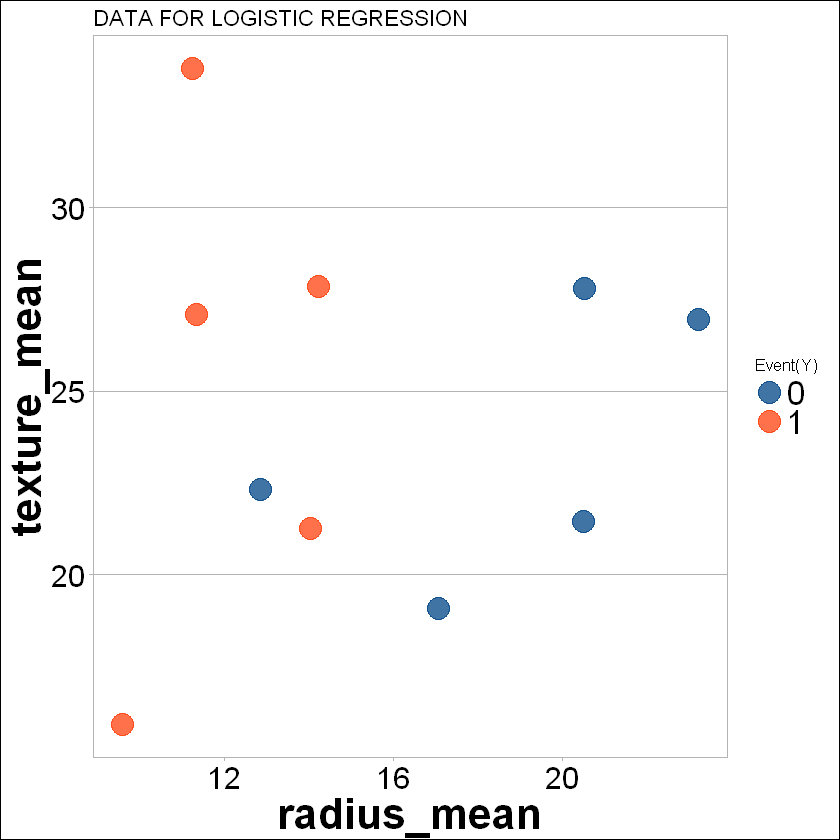

In [228]:

library(ggplot2)
library(ggthemes)
library(scales)
ggplot(data = data, aes(x = radius_mean, y = texture_mean, col =  as.factor(y)))+
  geom_point(size = 6, alpha = 0.75) +
  ggtitle("DATA FOR LOGISTIC REGRESSION")+
  theme_calc()+
  scale_color_calc("Event(Y)")+
  theme(axis.text = element_text(size = 18), axis.title = element_text(size = 26, face = "bold"), legend.text = element_text(size = 20))


In [240]:
l1 = glm(formula = diagnosis~.,family = binomial, data = data)
prob_pred = predict(classifier, type = 'response', newdata = data[,2:3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [250]:
l1


Call:  glm(formula = diagnosis ~ ., family = binomial, data = data)

Coefficients:
 (Intercept)   radius_mean  texture_mean  
      5.7198       -0.7923        0.2510  

Degrees of Freedom: 9 Total (i.e. Null);  7 Residual
Null Deviance:	    13.86 
Residual Deviance: 5.2 	AIC: 11.2

In [872]:
#Declaring variables
parameter_vector = matrix(data = 0, nrow = 3, ncol = 1 )
design_matrix = cbind(matrix(data = 1, nrow = 10, ncol = 1), as.matrix(data[,2:3]))
colnames(design_matrix) = NULL
y = as.matrix(data[,1])
y = matrix(data = as.numeric(y), nrow = 10, ncol = 1)
colnames(y) = NULL
m = nrow(data)
temp = parameter_vector
alpha = 0.01
change = 1


In [ ]:
while(change == 1){
  z = design_matrix%*%parameter_vector
  hypothesis_matrix = 1/(1 + exp(-z))
  diff = hypothesis_matrix - y
  temp = parameter_vector - t(alpha/m*t(diff)%*%design_matrix)
  print(temp)
  if(all(temp == parameter_vector)){
    change = 0
  }
    parameter_vector = temp
}

In [908]:
hypothesis_matrix

230,0.751840055
231,0.048013669
232,0.972368047
233,0.995881487
234,0.038784850
235,0.860279846
236,0.475264700
237,0.004112714
238,0.007143532
239,0.828152031


In [919]:
res <- function(x){
    z = x%*%parameter_vector
    value = 1/(1 + exp(-z))
    if(value >= 0.5){
        ans = 1
    }
    else{
        ans = 0
        }
    return(ans)
}

<h1>Relation between glm model and my model</h1>

In [921]:
cor(l1$coefficients, parameter_vector)

0.9995627
